# Data 200: Database Systems and Data Management for Data Analytics


# Name: Chloe Ho

In [2]:
from selenium import webdriver
import pandas as pd
import re
import time 
import random
import matplotlib.pyplot as plt

# Scraping task

I will scrape reviews from BestBuy.com. This is the link to the item that I am going to scrape:

`https://www.bestbuy.com/site/reviews/apple-airpods-with-charging-case-2nd-generation-white/6084400?variant=A&skuId=6084400`


My goal is to scrape 1,000 reviews that were posted in the reviews page of my assigned item. The format of my output should be a dataframe with the following columns/format:

```
username: the user name of the reviewer
review: the review content
rating: the rating (out of 5) left by the reviewer
helpful: the number of votes received on the review indicating that the review is helpful
unhelpful: the number of votes received on the review indicating that the review is unhelpful
net: |helpful - unhelpful| i.e., the absolute value of the difference between "helpful" and "unhelpful" votes
nethelpful: helpful - unhelpful i.e., the difference between "helpful" and "unhelpful" votes
total: total number of votes (helpful + unhelpful) received
length: length of the review, defined as the number of characters in a review (including whitespace)
```

I will also include the `.ipynb` and `.md` versions of my work + the following two scatterplots as part of my output. 
* scatterplot with `length` on the x axis, `total` on the y axis
* scatterplot with `length` on the x axis, `nethelpful` on the y axis

In [3]:
driver = webdriver.Chrome('/Users/hochl/Downloads/chromedriver')

/var/folders/2f/00sdrmc55c31t4b6_w_60sl80000gn/T/ipykernel_9328/1548921077.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/Users/hochl/Downloads/chromedriver')


In [4]:
driver.get('https://www.bestbuy.com/site/reviews/apple-airpods-with-charging-case-2nd-generation-white/6084400?variant=A&skuId=6084400')

In [13]:
def get_reviewid():
    # get comment ids that appear on the page
    ids = driver.find_elements('xpath',"//*[contains(@id,'ugc-line-clamp-reviews-')]")
    review_ids = []
    for i in ids:
        review_ids.append(i.get_attribute('id'))
    return review_ids

def get_reviews():

    reviews = []
    n=1

    for x in review_ids:
        # Extract username from each user
        username_element = driver.find_element("xpath", "//*[@id='reviews-accordion']/div[1]/ul/li["+str(n)+"]/div/div[2]/div[2]/div[1]/span/span/button")
        username = username_element.text

        # Extract review
        review_element = driver.find_element("xpath", '//*[@id="'+x+'"]')
        review = review_element.text.strip("\n")
        
        # Extract rating 
        rating_element = driver.find_element("xpath", "//*[@id='reviews-accordion']/div[1]/ul/li["+str(n)+"]/div/div[2]/div[1]/div")
        rating = rating_element.text
        rating = re.findall("\d", rating)[0]

        # Extract helpful votes
        helpful_element = driver.find_element("xpath", "//*[@id='reviews-accordion']/div[1]/ul/li["+str(n)+"]/div/div[2]/div[6]/div/div/div[1]/button[1]")
        helpful = helpful_element.text
        helpful = re.findall("\d+", helpful)[0]

        # Extract unhelpful votes
        unhelpful_element = driver.find_element("xpath", "//*[@id='reviews-accordion']/div[1]/ul/li["+str(n)+"]/div/div[2]/div[6]/div/div/div[1]/button[2]")
        unhelpful = unhelpful_element.text
        unhelpful = re.findall("\d+", unhelpful)[0]

        # Take absolute value of the difference between "helpful" and "unhelpful" votes
        net = abs(int(helpful) - int(unhelpful))

        # Take the difference between "helpful" and "unhelpful" votes
        nethelpful = int(helpful) - int(unhelpful)

        # Total number of votes (helpful + unhelpful) received
        total = int(helpful) + int(unhelpful)
        
        # The length of the review
        length = len(review)
        
        reviews.append([username,review,rating,helpful,unhelpful,net,nethelpful,total,length])
        
        n+=1
    
    return reviews

def get_loc():
    num = len(driver.find_element('xpath','//*[@id="reviews-accordion"]').text.split('\n'))
    attributes = []
    location = []
    for m in range(20):
        try:
            attributes.append(driver.find_element('xpath',"//*[@id='reviews-accordion']/div[2]/div/div[2]/ul/li["+str(m)+"]/a") \
                              .get_attribute('title'))
            if driver.find_element('xpath',"//*[@id='reviews-accordion']/div[2]/div/div[2]/ul/li["+str(m)+"]/a") \
                              .get_attribute('title') == 'next Page':
                location.append(m)
            return location[0]
        except:
            attributes.append('.')

In [14]:
num = len(driver.find_element('xpath','//*[@id="reviews-accordion"]').text.split('\n'))
num

273

In [15]:
df_out = pd.DataFrame()

for j in range(50):
    
    try:

        # get comment ids
        review_ids = get_reviewid()

        # get comments
        reviews = get_reviews()

        # df with the current page data
        df = pd.DataFrame(reviews,columns=['username','review','rating','helpful','unhelpful','net','nethelpful','total','length'])

        # df_out with the entire data
        df_out = pd.concat([df_out,df])

        # wait between 2-5 second
        time.sleep(random.uniform(2,5))

        # find the location of the next page button, then click on it!
        button = driver.find_element('xpath','//*[@title="next Page"]')
        button.click()
    
    except: 
        print('Error!')

    

In [16]:
df_out.reset_index(drop=True)

,username,review,rating,helpful,unhelpful,net,nethelpful,total,length
0,MKLight,I’ve been purchasing Plantronics Bluetooth ear...,5,295,137,158,158,432,869
1,Gabby,Don’t listen to any one that says the AirPods ...,5,5,1,4,4,6,231
2,Lookbeforebuying,Has a lot of bass! I should’ve got these in th...,5,39,7,32,32,46,517
3,Kay08,They are very convenient especially when I’m w...,5,110,45,65,65,155,619
4,WhitS,My new Airpods are incredible. They work grea...,5,0,0,0,0,0,189
...,...,...,...,...,...,...,...,...,...
975,KendrelT,These AirPods were great ! They work great i l...,5,0,0,0,0,0,54
976,Nikki,Work just like the advertisement. Perfect ! Th...,5,0,0,0,0,0,55
977,xTristanx,"So, I already had a pair of airpods that were ...",5,6,0,6,6,6,810
978,Tukayo,"Easy to use, good sound. Fits ear well. Would ...",5,0,0,0,0,0,56


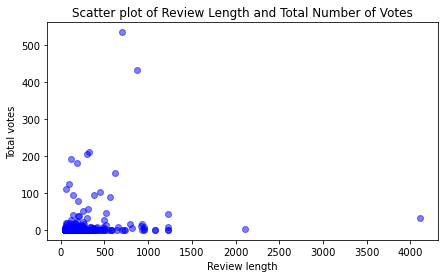

In [17]:
plt.figure(figsize=(7,4)) # change figure size

plt.scatter(df_out.length, df_out.total, alpha=0.5, color = 'blue')
plt.title("Scatter plot of Review Length and Total Number of Votes")

plt.xlabel('Review length')
plt.ylabel('Total votes')

plt.show()

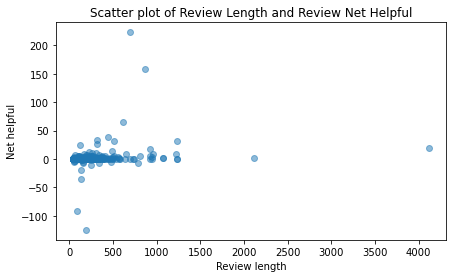

In [18]:
plt.figure(figsize=(7,4)) # change figure size

plt.scatter(df_out.length, df_out.nethelpful, alpha=0.5)
plt.title("Scatter plot of Review Length and Review Net Helpful")

plt.xlabel('Review length')
plt.ylabel('Net helpful')

plt.show()

The scatter plot shows that there is no linear relationship between the length of the review and the total of votes  received by the review/nethelpful indicator. There are quite a few outliers: a review has more than 4000 characters but received 0 votes and 0 nethelpful while a-less-than-1000-character review receives around 550 total votes & more than 200 nethelpful scores. Most of the reviews receive 0 to 50 total votes and the average nethelpful score is 0.